In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/breastcancerdataset/BRCA.csv')
df.head(10)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.547150,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.614470,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.327470,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.193040,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.520450,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
5,TCGA-AO-A1KQ,84.0,MALE,-0.081872,1.72410,-0.057335,0.043025,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,18-Sep-17,15-Nov-21,Alive
6,TCGA-D8-A73X,53.0,FEMALE,-0.069535,1.41830,-0.361050,0.391580,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,04-Feb-17,07-Feb-18,Alive
7,TCGA-A7-A426,50.0,FEMALE,0.672490,1.27900,-0.321070,-0.112390,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,16-May-17,NaN,NaN
8,TCGA-EW-A1P5,77.0,FEMALE,-0.151750,-0.66332,1.189400,0.217180,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,28-Sep-17,28-Sep-18,Alive
9,TCGA-A8-A09A,40.0,FEMALE,-0.565700,1.26680,-0.293460,0.193950,II,Infiltrating Lobular Carcinoma,Positive,Positive,Positive,Other,14-Feb-17,15-Dec-17,Alive


In [2]:
df.shape

(341, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [6]:
df.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [5]:
df = df.dropna()

In [7]:
df = df.drop(columns=['Patient_ID'],axis=1)
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [8]:
df["Tumour_Stage"] = df["Tumour_Stage"].map({"I": 1, "II": 2, "III": 3})
df["Histology"] = df["Histology"].map({"Infiltrating Ductal Carcinoma": 1, 
                                           "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3})
df["ER status"] = df["ER status"].map({"Positive": 1})
df["PR status"] = df["PR status"].map({"Positive": 1})
df["HER2 status"] = df["HER2 status"].map({"Positive": 1, "Negative": 2})
df["Gender"] = df["Gender"].map({"MALE": 0, "FEMALE": 1})
df["Surgery_type"] = df["Surgery_type"].map({"Other": 1, "Modified Radical Mastectomy": 2, 
                                                 "Lumpectomy": 3, "Simple Mastectomy": 4})

df.head(10)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36.0,1,0.080353,0.42638,0.547150,0.273680,3,1,1,1,2,2,15-Jan-17,19-Jun-17,Alive
1,43.0,1,-0.420320,0.57807,0.614470,-0.031505,2,3,1,1,2,3,26-Apr-17,09-Nov-18,Dead
2,69.0,1,0.213980,1.31140,-0.327470,-0.234260,3,1,1,1,2,1,08-Sep-17,09-Jun-18,Alive
3,56.0,1,0.345090,-0.21147,-0.193040,0.124270,2,1,1,1,2,2,25-Jan-17,12-Jul-17,Alive
4,56.0,1,0.221550,1.90680,0.520450,-0.311990,2,1,1,1,2,1,06-May-17,27-Jun-19,Dead
5,84.0,0,-0.081872,1.72410,-0.057335,0.043025,3,1,1,1,2,2,18-Sep-17,15-Nov-21,Alive
6,53.0,1,-0.069535,1.41830,-0.361050,0.391580,2,1,1,1,2,4,04-Feb-17,07-Feb-18,Alive
8,77.0,1,-0.151750,-0.66332,1.189400,0.217180,2,1,1,1,2,2,28-Sep-17,28-Sep-18,Alive
9,40.0,1,-0.565700,1.26680,-0.293460,0.193950,2,2,1,1,1,1,14-Feb-17,15-Dec-17,Alive
10,71.0,1,-0.223050,0.50594,-0.349430,-0.835300,2,1,1,1,2,3,26-May-17,19-Dec-17,Alive


In [12]:
df['Patient_Status'] = df['Patient_Status'].map({'Alive':1,'Dead':0})
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36.0,1,0.080353,0.42638,0.54715,0.273680,3,1,1,1,2,2,15-Jan-17,19-Jun-17,1
1,43.0,1,-0.420320,0.57807,0.61447,-0.031505,2,3,1,1,2,3,26-Apr-17,09-Nov-18,0
2,69.0,1,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,2,1,08-Sep-17,09-Jun-18,1
3,56.0,1,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,2,2,25-Jan-17,12-Jul-17,1
4,56.0,1,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,2,1,06-May-17,27-Jun-19,0


In [13]:
df = df.drop(columns=['Date_of_Surgery','Date_of_Last_Visit'],axis=1)
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36.0,1,0.080353,0.42638,0.54715,0.273680,3,1,1,1,2,2,1
1,43.0,1,-0.420320,0.57807,0.61447,-0.031505,2,3,1,1,2,3,0
2,69.0,1,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,2,1,1
3,56.0,1,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,2,2,1
4,56.0,1,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,2,1,0


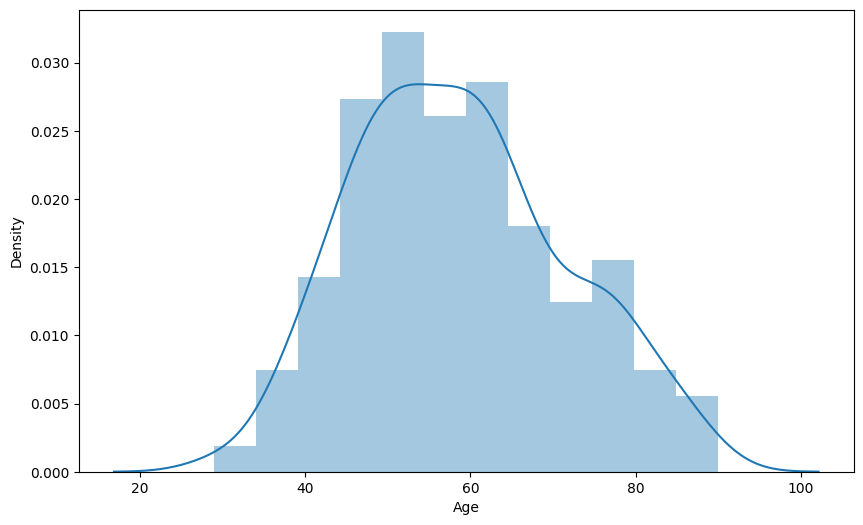

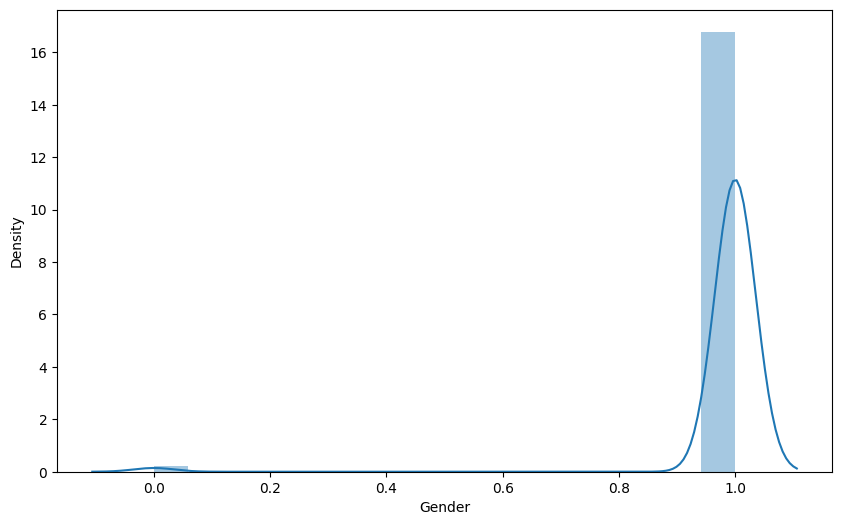

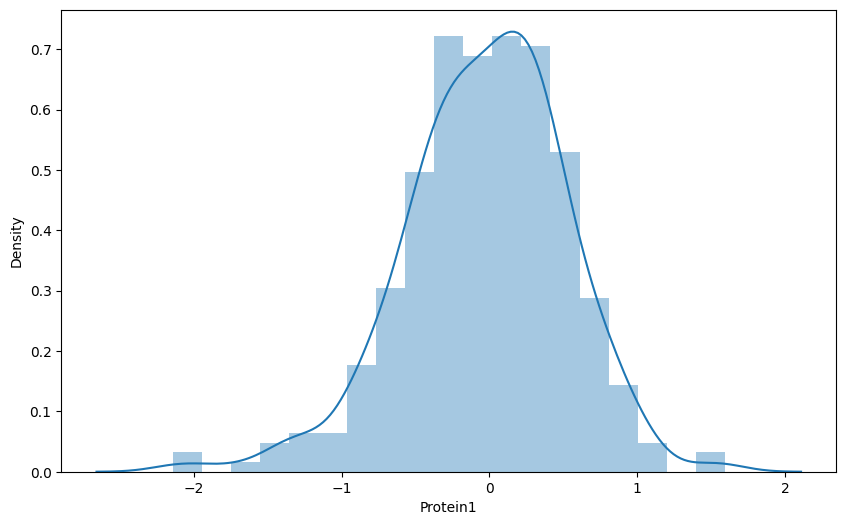

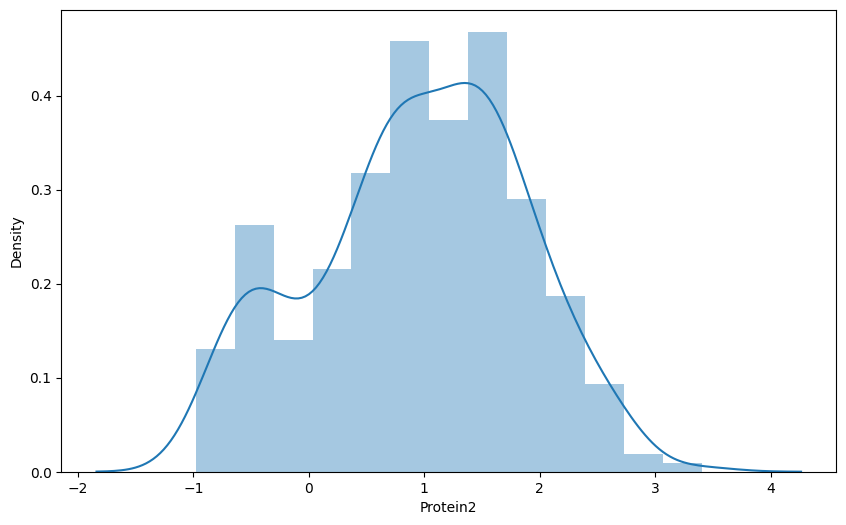

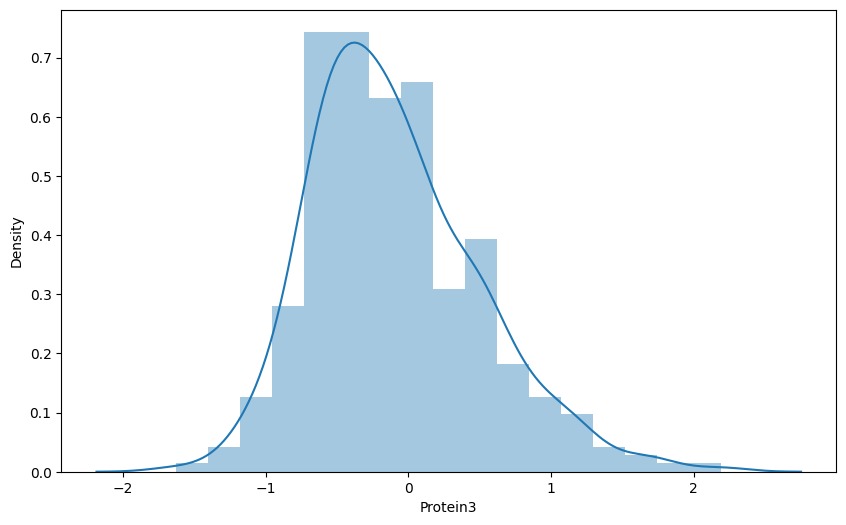

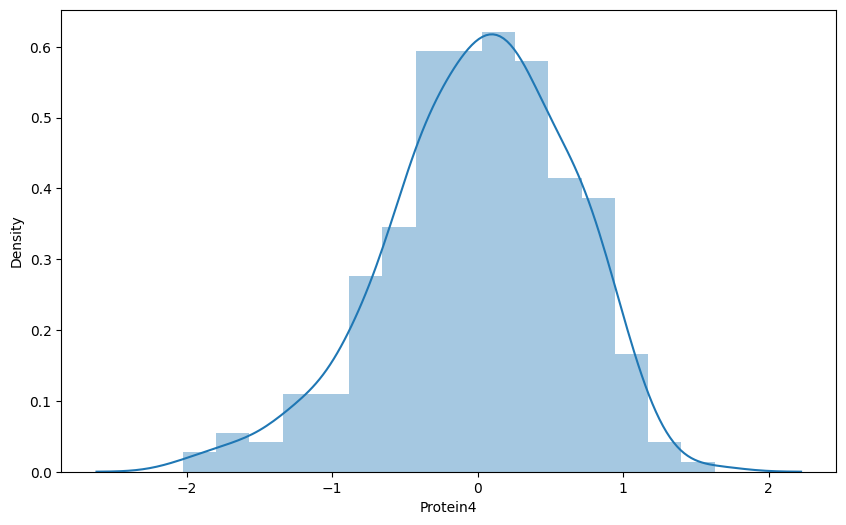

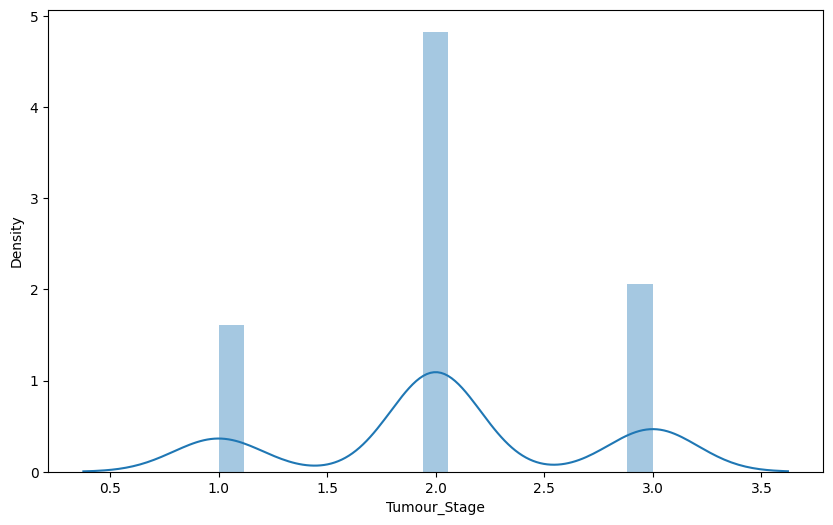

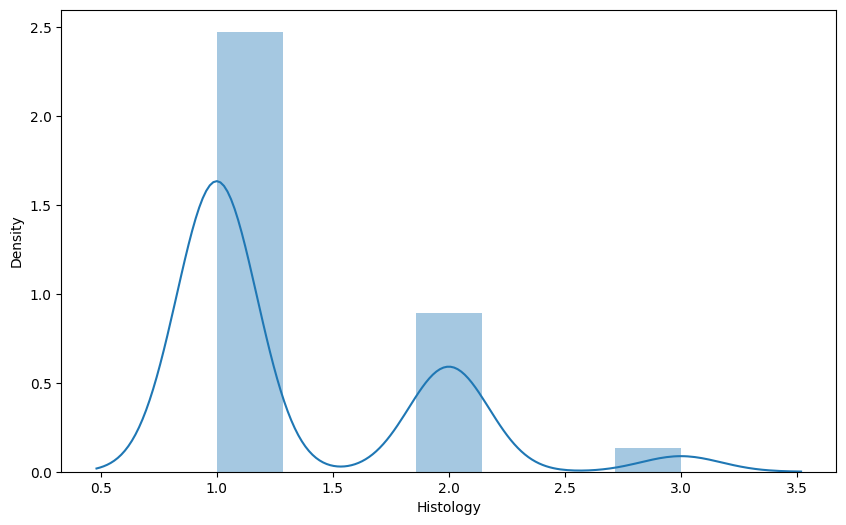

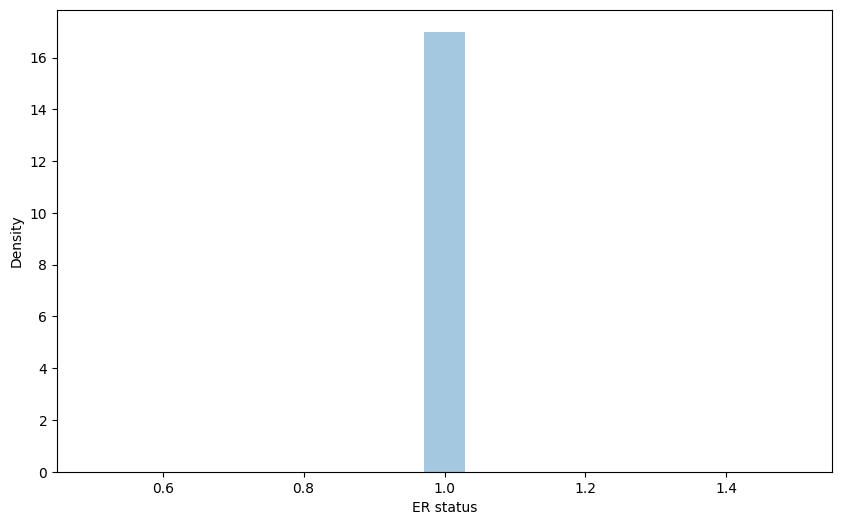

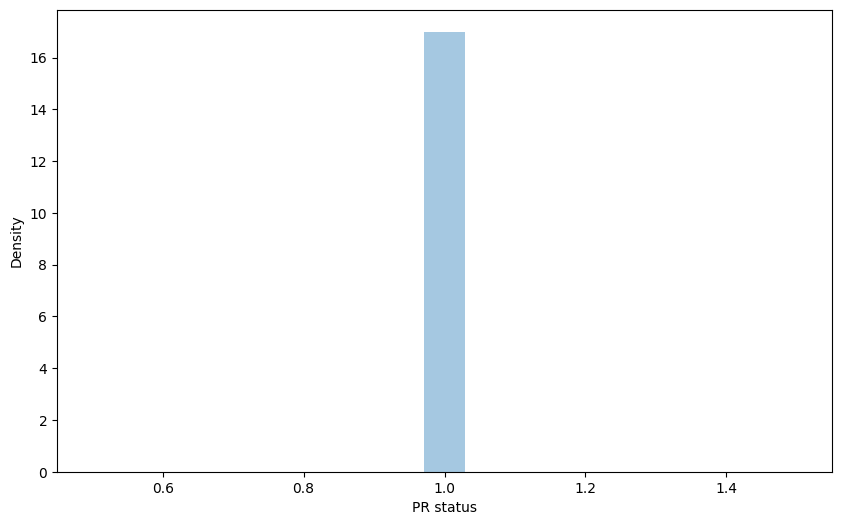

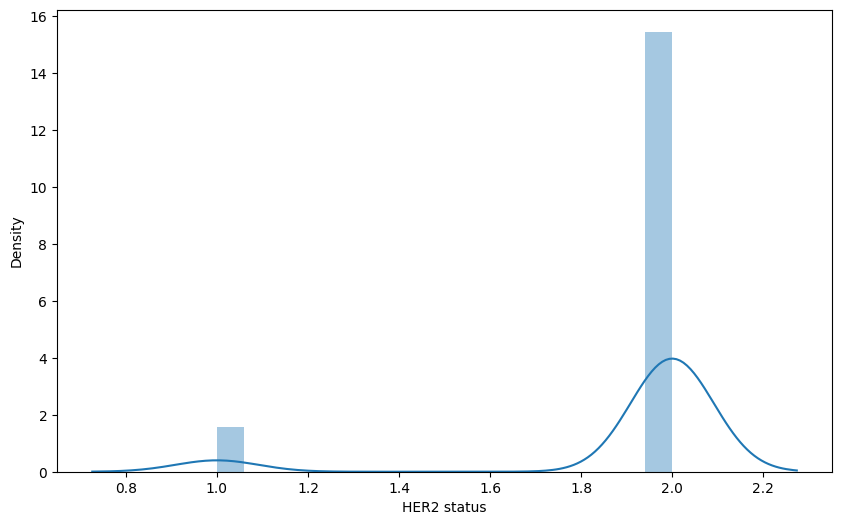

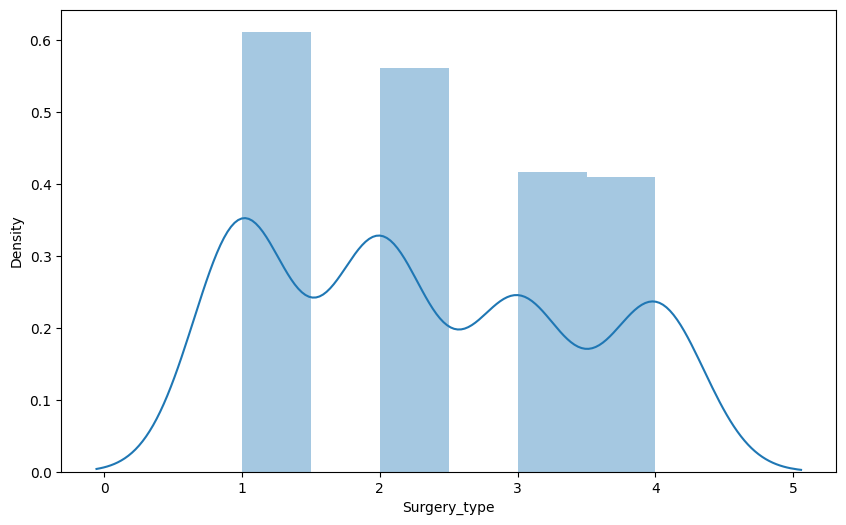

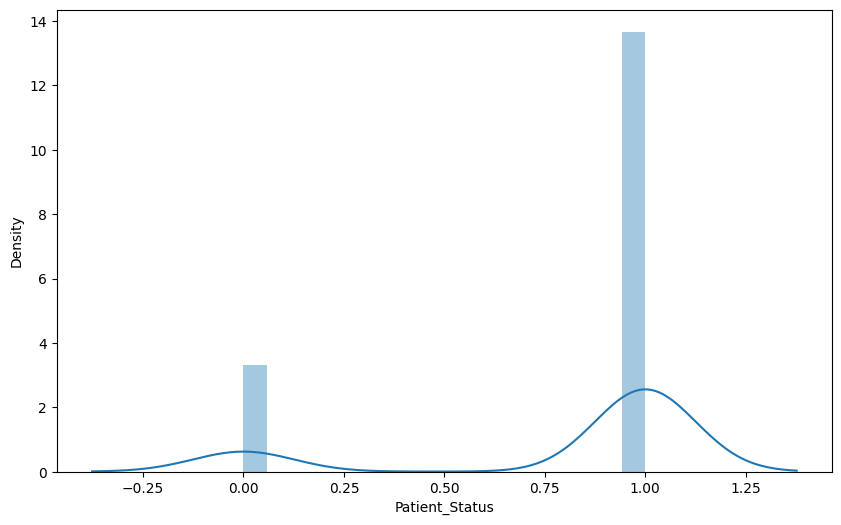

In [15]:
#check dist of all columns
import matplotlib.pyplot as plt
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(df[col])
  plt.show()

In [ ]:
x = df.drop(columns=['Patient_Status'],axis=1)
y = df['Patient_Status']

#Train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#model selections
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#objects
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
svc = SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()
lgb = LGBMClassifier()
cat = CatBoostClassifier()

#Fittings
lr.fit(x_train_scaled,y_train)
rf.fit(x_train_scaled,y_train)
gb.fit(x_train_scaled,y_train)
xgb.fit(x_train_scaled,y_train)
svc.fit(x_train_scaled,y_train)
knn.fit(x_train_scaled,y_train)
nb.fit(x_train_scaled,y_train)
lgb.fit(x_train_scaled,y_train)
cat.fit(x_train_scaled,y_train)



In [21]:
#preds
lrpred = lr.predict(x_test_scaled)
rfpred = rf.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
svcpred = svc.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)
nbpred = nb.predict(x_test_scaled)
lgbpred = lgb.predict(x_test_scaled)
catpred = cat.predict(x_test_scaled)

#Evaluations
from sklearn.metrics import accuracy_score
lracc = accuracy_score(y_test,lrpred)
rfacc = accuracy_score(y_test,rfpred)
gbacc = accuracy_score(y_test,gbpred)
xgbacc = accuracy_score(y_test,xgbpred)
svcacc = accuracy_score(y_test,svcpred)
knnacc = accuracy_score(y_test,knnpred)
nbacc = accuracy_score(y_test,nbpred)
lgbacc = accuracy_score(y_test,lgbpred)
catacc = accuracy_score(y_test,catpred)

print('LOGISTIC REG',lracc)
print('RANDOM FOREST',rfacc)
print('GB',gbacc)
print('XGB',xgbacc)
print('SVC',svcacc)
print('KNN',knnacc)
print('NB',nbacc)
print('LIGHT GBM',lgbacc)
print('CATO',catacc)


LOGISTIC REG 0.8125
RANDOM FOREST 0.828125
GB 0.8125
XGB 0.78125
SVC 0.828125
KNN 0.78125
NB 0.8125
LIGHT GBM 0.8125
CATO 0.828125


In [22]:
# Prediction
# features = [['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']]
features = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2,]])
print(rf.predict(features))

[1]
